In [2]:
import pandas as pd     # buat baca & ngolah data tabular
import numpy as np      # buat operasi numerik (fondasi hitungan)
import matplotlib.pyplot as plt     # mesin dasar visualisasi
import seaborn as sns       # visualisasi statistik yang lebih rapih

%matplotlib inline

In [3]:
df =pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.shape

(270, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


### Ringkasan Klasifikasi Variabel

Variabel dalam dataset ini dikelompokkan sebagai berikut:

- **Variabel Numerik Kontinu:**  
  Age, BP, Cholesterol, Max HR, ST depression  

- **Variabel Numerik Kategorikal (Terkode):**  
  Sex, Chest pain type, FBS over 120, EKG results, Exercise angina,  
  Slope of ST, Number of vessels fluro, Thallium  

- **Variabel Target:**  
  Heart Disease (Presence / Absence)

Klasifikasi ini penting untuk memastikan bahwa metode analisis statistik dan teknik visualisasi yang digunakan sesuai dengan karakteristik masing-masing variabel. Dengan memahami tipe variabel sejak awal, analisis eksploratif dapat dilakukan secara lebih akurat dan tidak menimbulkan interpretasi yang menyesatkan.


### Variabel Fitur dan Target

Dalam dataset ini, variabel target adalah **Heart Disease**, yang menunjukkan ada atau tidaknya penyakit jantung pada pasien. Seluruh variabel lainnya diperlakukan sebagai fitur, karena memberikan informasi yang dapat digunakan untuk menjelaskan atau memprediksi variabel target.


In [7]:
df['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

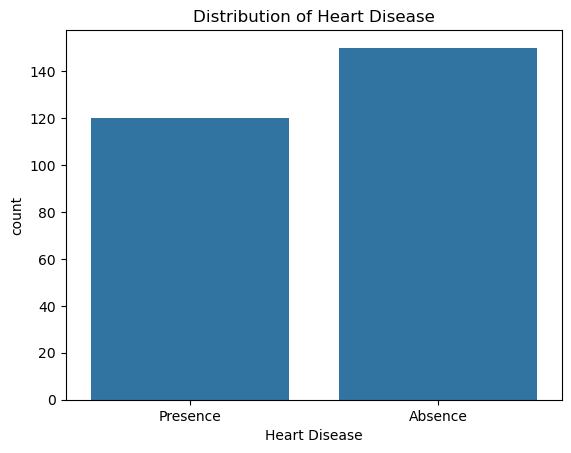

In [8]:
sns.countplot(x='Heart Disease', data=df)
plt.title('Distribution of Heart Disease')
plt.show()

### Distribusi Variabel Target

Distribusi variabel target **Heart Disease** menunjukkan kondisi yang relatif seimbang. Dari total 270 observasi, terdapat 150 data dengan kondisi tidak memiliki penyakit jantung (Absence) dan 120 data dengan kondisi memiliki penyakit jantung (Presence). Kondisi ini menunjukkan bahwa dataset tidak mengalami ketimpangan kelas yang ekstrem, sehingga analisis eksploratif lanjutan dapat dilakukan tanpa bias yang signifikan terhadap salah satu kelas.


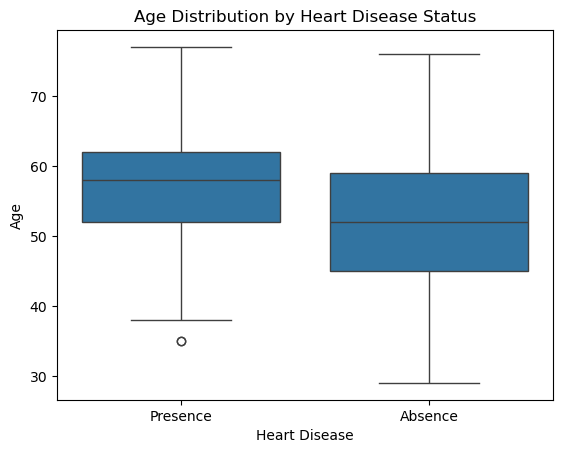

In [9]:
sns.boxplot(x='Heart Disease', y='Age', data=df)
plt.title('Age Distribution by Heart Disease Status')
plt.show()

### Distribusi Umur Berdasarkan Status Penyakit Jantung

Variabel umur (Age) merupakan variabel numerik kontinu yang secara umum berkaitan dengan risiko penyakit kardiovaskular. Visualisasi boxplot digunakan untuk membandingkan distribusi umur antara pasien yang memiliki dan tidak memiliki penyakit jantung. Grafik ini memudahkan pengamatan perbedaan nilai tengah, sebaran data, serta potensi outlier pada masing-masing kelas target.


### Hubungan Umur dengan Penyakit Jantung

Perbandingan distribusi umur antara pasien yang memiliki dan tidak memiliki penyakit jantung menunjukkan adanya perbedaan nilai median. Pasien dengan penyakit jantung cenderung memiliki umur yang lebih tinggi dibandingkan pasien tanpa penyakit jantung. Meskipun demikian, keberadaan beberapa pasien berumur lebih muda pada kelompok penderita penyakit jantung menunjukkan bahwa umur saja tidak cukup untuk menjelaskan terjadinya penyakit jantung.


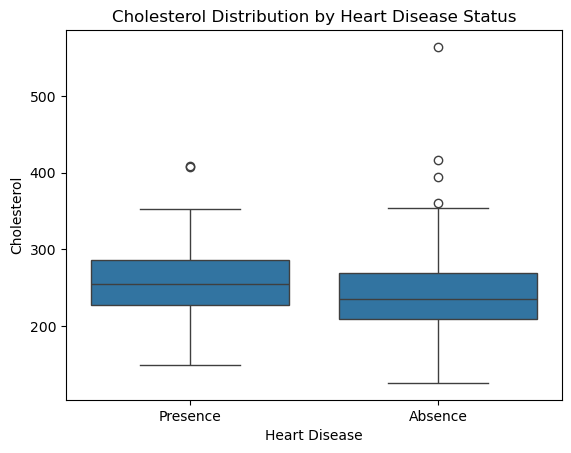

In [10]:
sns.boxplot(x='Heart Disease', y='Cholesterol', data=df)
plt.title('Cholesterol Distribution by Heart Disease Status')
plt.show()

### Hubungan Kolesterol dengan Penyakit Jantung

Kolesterol merupakan variabel numerik kontinu yang memiliki peran penting dalam kesehatan kardiovaskular. Visualisasi boxplot digunakan untuk membandingkan kadar kolesterol antara pasien yang memiliki dan tidak memiliki penyakit jantung. Grafik ini membantu mengamati perbedaan nilai tengah, sebaran data, serta keberadaan nilai ekstrem (outlier) pada masing-masing kelas target.


### Hubungan Kolesterol dengan Penyakit Jantung

Perbandingan kadar kolesterol antara pasien yang memiliki dan tidak memiliki penyakit jantung menunjukkan perbedaan median yang relatif moderat, di mana pasien dengan penyakit jantung cenderung memiliki kadar kolesterol yang sedikit lebih tinggi. Namun, terdapat tumpang tindih distribusi yang cukup besar serta keberadaan nilai ekstrem pada kedua kelompok. Hal ini menunjukkan bahwa kolesterol saja tidak cukup untuk membedakan status penyakit jantung dan perlu dipertimbangkan bersama faktor klinis lainnya.


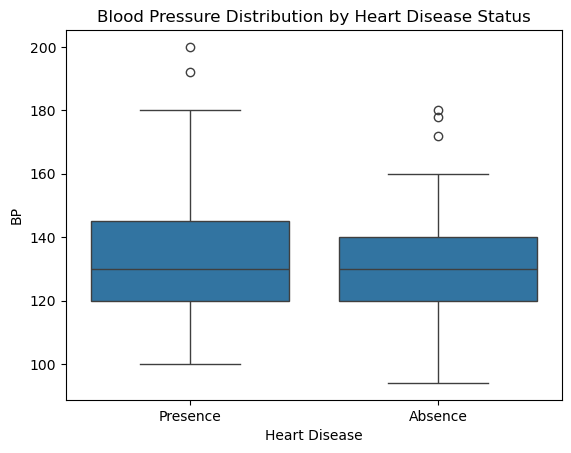

In [11]:
sns.boxplot(x='Heart Disease', y='BP', data=df)
plt.title('Blood Pressure Distribution by Heart Disease Status')
plt.show()

### Hubungan Tekanan Darah dengan Penyakit Jantung

Tekanan darah (BP) merupakan variabel numerik kontinu yang sering dikaitkan dengan risiko penyakit kardiovaskular. Visualisasi boxplot digunakan untuk membandingkan distribusi tekanan darah antara pasien dengan dan tanpa penyakit jantung, sehingga perbedaan nilai tengah, sebaran data, serta potensi nilai ekstrem dapat diamati dengan jelas.


### Hubungan Tekanan Darah dengan Penyakit Jantung

Perbandingan distribusi tekanan darah antara pasien dengan dan tanpa penyakit jantung menunjukkan nilai median yang relatif serupa serta tingkat tumpang tindih data yang cukup tinggi. Hal ini mengindikasikan bahwa tekanan darah saja belum dapat menjadi faktor pembeda yang kuat dalam menentukan status penyakit jantung pada dataset ini, sehingga perlu dianalisis bersama variabel klinis lainnya.


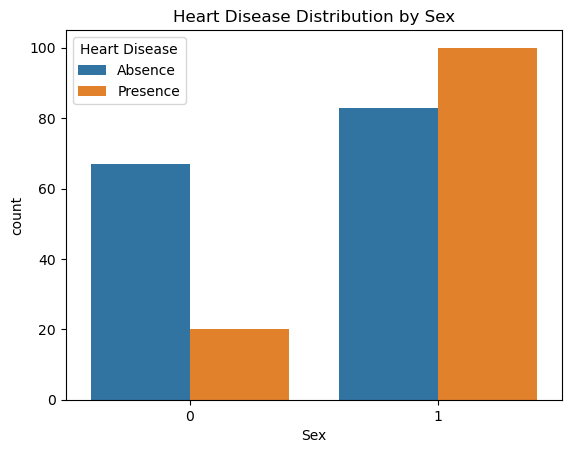

In [12]:
sns.countplot(x='Sex', hue='Heart Disease', data=df)
plt.title('Heart Disease Distribution by Sex')
plt.show()

### Hubungan Jenis Kelamin dengan Penyakit Jantung

Jenis kelamin (Sex) merupakan variabel kategorikal yang dapat berpengaruh terhadap risiko penyakit kardiovaskular. Visualisasi countplot digunakan untuk menampilkan distribusi status penyakit jantung berdasarkan jenis kelamin, sehingga perbedaan proporsi antar kelompok dapat diamati secara jelas.


### Hubungan Jenis Kelamin dengan Penyakit Jantung

Jenis kelamin merupakan variabel kategorikal yang menunjukkan perbedaan distribusi penyakit jantung yang cukup jelas. Visualisasi ini memperlihatkan bahwa kejadian penyakit jantung lebih banyak ditemukan pada salah satu kategori jenis kelamin dibandingkan kategori lainnya. Hal ini mengindikasikan bahwa jenis kelamin dapat menjadi faktor yang berkaitan dengan risiko penyakit jantung dan perlu dianalisis lebih lanjut bersama variabel klinis lainnya.


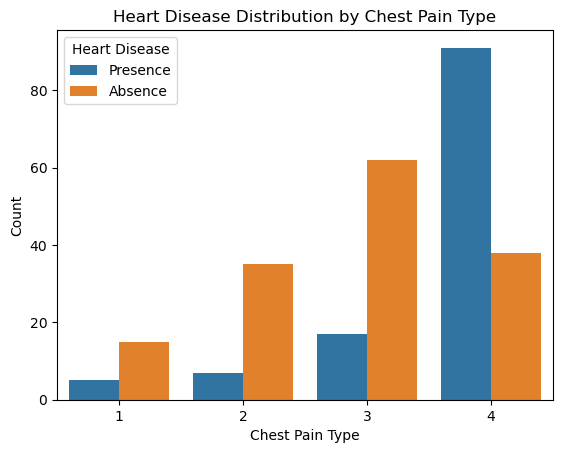

In [15]:
sns.countplot(x='Chest pain type', hue='Heart Disease', data=df)
plt.title('Heart Disease Distribution by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

### Hubungan Jenis Nyeri Dada dengan Penyakit Jantung

Distribusi penyakit jantung menunjukkan perbedaan yang jelas pada masing-masing jenis nyeri dada. Pasien dengan jenis nyeri dada tipe 4 memiliki jumlah kasus penyakit jantung yang jauh lebih tinggi dibandingkan kategori lainnya. Temuan ini menunjukkan adanya hubungan antara karakteristik nyeri dada tertentu dengan kejadian penyakit jantung.

Menariknya, jenis nyeri dada tipe 4 (asimtomatik) menunjukkan jumlah kasus penyakit jantung tertinggi. Hal ini dapat mengindikasikan bahwa pasien tanpa gejala nyeri dada khas cenderung memiliki kondisi penyakit jantung yang tidak terdeteksi lebih awal, sehingga baru diketahui setelah dilakukan pemeriksaan lanjutan.


Visualisasi menunjukkan adanya perbedaan distribusi [TARGET] berdasarkan [FEATURE]. Temuan ini mengindikasikan adanya hubungan antara [FEATURE] dengan kejadian [TARGET]. Salah satu kemungkinan penjelasan adalah [ALASAN LOGIS], yang dapat memengaruhi bagaimana kondisi tersebut terdeteksi.